# Uczenie nadzorowane - predykcja
Import bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import xgboost as xgb
import math
import numpy as np

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(url, delim_whitespace=True, names=names)

display(dataset.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## EDA

In [3]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
print(dataset.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Text(0.5, 1.0, 'Correlation matrix between variables')

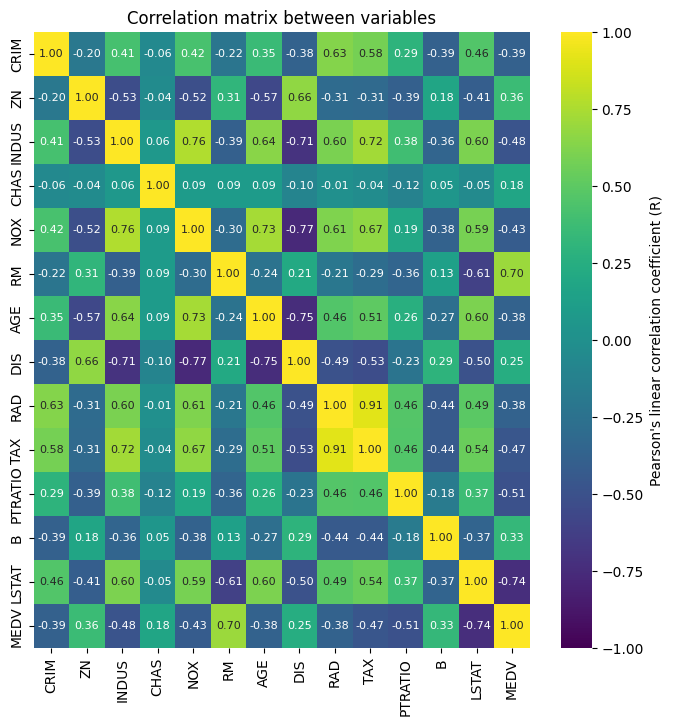

In [5]:
plt.figure(figsize=(8, 8))
sns.heatmap(dataset.corr(), annot=True, annot_kws={"fontsize":8}, fmt=".2f", cmap='viridis', vmin=-1, vmax=1, cbar_kws={'label': "Pearson's linear correlation coefficient (R)"})
plt.title('Correlation matrix between variables')

Text(0, 0.5, 'MEDV')

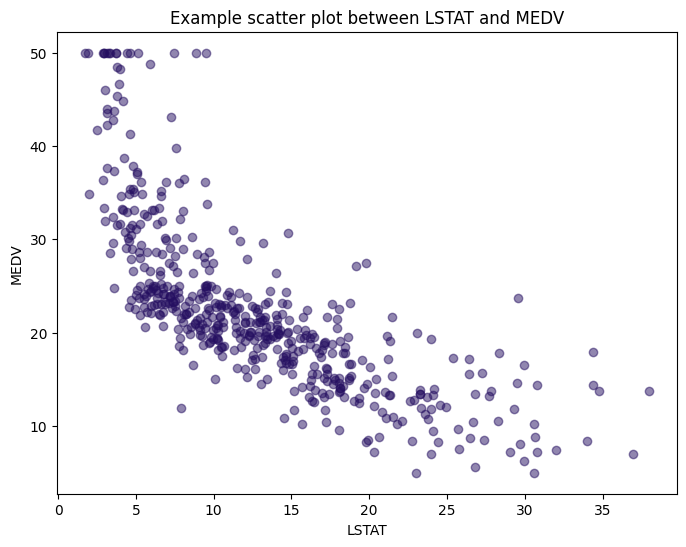

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(dataset['LSTAT'], dataset['MEDV'], color="#250F61", alpha=0.5)
plt.title("Example scatter plot between LSTAT and MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

Text(0, 0.5, 'NOX')

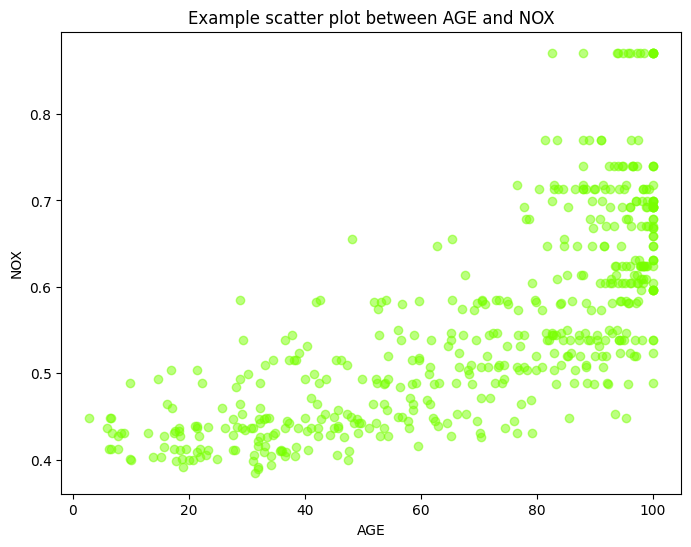

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter( dataset['AGE'], dataset['NOX'], color='#78FF00', alpha=0.5)
plt.title('Example scatter plot between AGE and NOX')
plt.xlabel('AGE')
plt.ylabel('NOX')

Text(0, 0.5, 'MEDV')

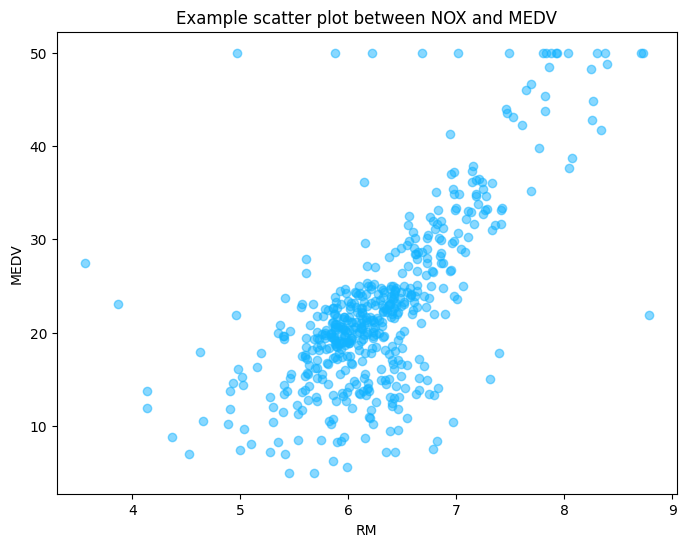

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter( dataset['RM'], dataset['MEDV'], color='#12B3FF', alpha=0.5)
plt.title('Example scatter plot between NOX and MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

Do wykresów punktowych wybrane zostały takie połączenia kolumn, dla których współczynnik korelacji Pearsona był jednym z większych. Oprócz tych zestawień widać wysoką współliniowość na przykład pomiędzy zmiennymi NOX i INDUS, DIS i INDUS, AGE czy AGE i DIS.

## Podział zbioru danych

In [9]:
X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
display(y_train)
display(y_test)

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

## Modele regresji

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# XGBoost Gradientowe wzmacnianie drzew
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

## Dobór parametrów

In [11]:
params = {'learning_rate' : [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3)

grid = GridSearchCV(estimator=xg_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best score: %f using params: %s" % (grid.best_score_, grid.best_params_))

Best score: -13.743169 using params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [12]:
# Tworze model z najlepszymi parametrami
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3,  alpha=10, **grid.best_params_)
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)

In [13]:
#Regresja liniowa

y_pred_lr = lr.predict(X_test)
print('Linear Regression - MSE: ', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression - MAE: ', mean_absolute_error(y_test, y_pred_lr))
print('Linear Regression - R2: ', r2_score(y_test, y_pred_lr))
print('Linear Regression - MAXError: ', max_error(y_test, y_pred_lr), "\n")

y_pred_xg = xg_reg.predict(X_test)
print('XGBoost - MSE: ', mean_squared_error(y_test, y_pred_xg))
print('XGBoost - MAE: ', mean_absolute_error(y_test, y_pred_xg))
print('XGBoost - R2: ', r2_score(y_test, y_pred_xg))
print('XGBoost - MAXError: ', max_error(y_test, y_pred_xg))

Linear Regression - MSE:  24.291119474973478
Linear Regression - MAE:  3.189091965887837
Linear Regression - R2:  0.6687594935356326
Linear Regression - MAXError:  25.260428393480645 

XGBoost - MSE:  8.300848313048355
XGBoost - MAE:  1.885623426063388
XGBoost - R2:  0.8868073082374468
XGBoost - MAXError:  17.506866455078125


Na podstawie powyższych wyników można spekulować, że model XGBoost jest lepiej dopasowany do danych

# Założenia dla regresji liniowej
### 1. liniowa zależność

Text(0, 0.5, 'Residuals')

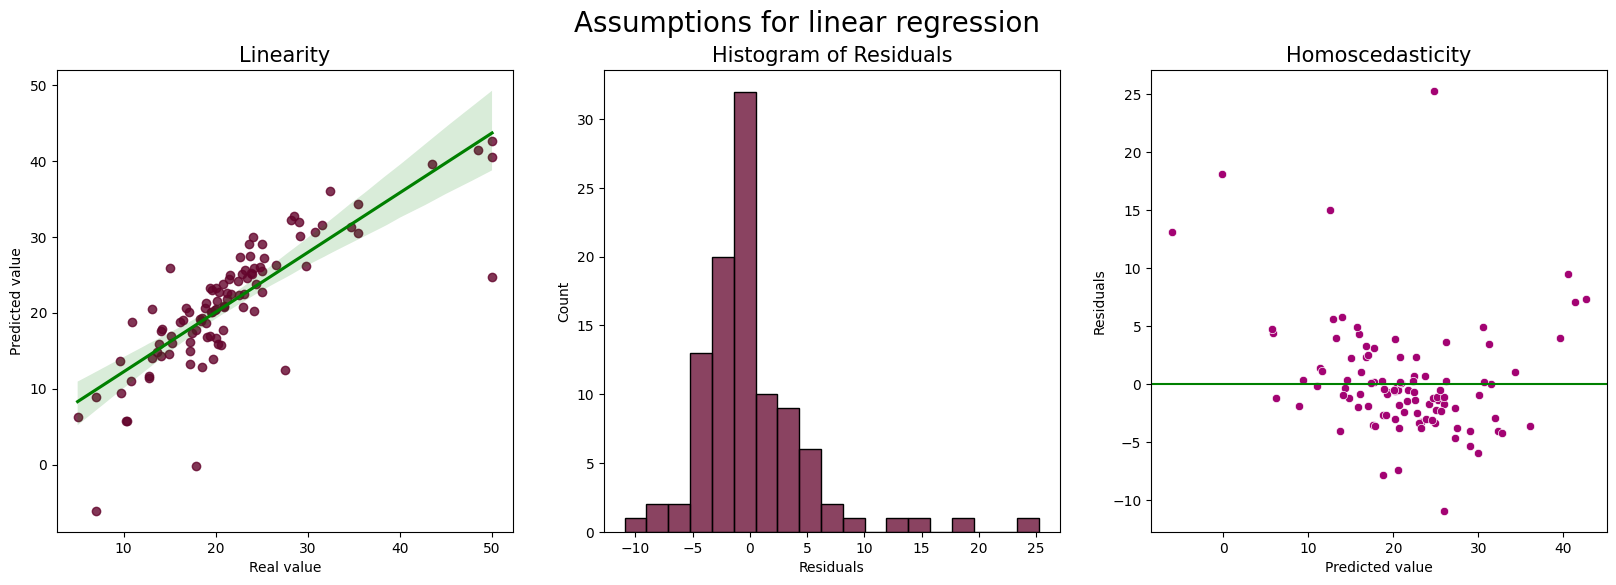

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Assumptions for linear regression", fontsize=20)
MEDV = pd.DataFrame({"Real":y_test,"Predicted":y_pred_lr})
sns.regplot(data=MEDV,x="Real",y="Predicted", ax=ax[0], color="#63042c", line_kws=dict(color="g"))
ax[0].set_xlabel("Real value")
ax[0].set_ylabel("Predicted value")
ax[0].set_title("Linearity", fontsize=15)

residuals_lr = y_test - y_pred_lr
sns.histplot(residuals_lr, ax=ax[1], color="#63042c")
ax[1].set_xlabel("Residuals")
ax[1].set_title("Histogram of Residuals", fontsize=15)

sns.scatterplot(x=y_pred_lr, y=residuals_lr, color='#a30373', ax=ax[2])
ax[2].set_title("Homoscedasticity", fontsize=15)
ax[2].axhline(y=0, c="green")
ax[2].set_xlabel("Predicted value")
ax[2].set_ylabel("Residuals")

1. Wykres liniowy wygląda względnie dobrze, pojawiają się wartości odstające. Pomimo to, na podstawie wcześniej stworzonego wykresu macierzy korelacji trzeba stwierdzić, że dla pewnych cech np. PTRATIO lub CHAS współczynnik korelacji liniowej Pearsona jest niski. To założenie nie jest spełnione.

2. Rozkład reszt jest prawostronnie asymetryczny, skośny. Ciężko byłoby go określić jako normalny. To założenie również nie jest spełnione.

3. Punkty na wykresie prezentującym homoskedastyczność nie są skupione wokół linii. Można zauważyć sporo wartości odstających.